In [1]:
import pandas as pd
# csv format from FlightRadar24
flight = pd.read_csv("../data/20171214_KL1300_(fd43298).csv", parse_dates=['UTC'])
flight['lat'], flight['lon'] = list(zip(*flight.Position.apply(lambda x: [float(t) for t in x.split(',')])))

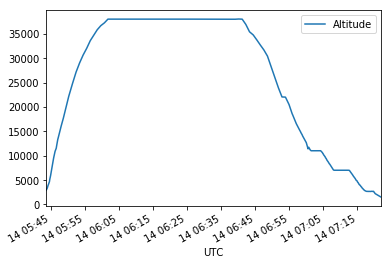

In [2]:
%matplotlib inline
flight.plot(x='UTC', y='Altitude')

In [3]:
from traffic.tools import douglas_peucker

mask = douglas_peucker(df=flight, max_dist=1e3, lat='lat', lon='lon')

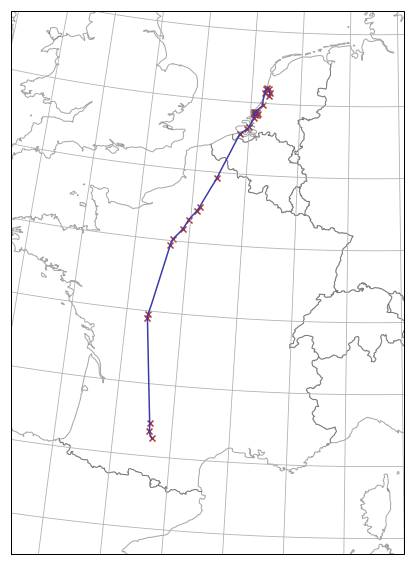

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from cartopy.crs import EuroPP, PlateCarree
from cartopy.feature import NaturalEarthFeature

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-3, 10, 41, 54))

ax.plot(flight.lon, flight.lat,
        transform=PlateCarree(), color="#3a3aaa")

ax.scatter(flight[mask].lon, flight[mask].lat,
           transform=PlateCarree(), color="#aa3a3a", marker='x')